In [39]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

In [40]:
import os
paths = []
labels = []

dataset_path = '/content/drive/MyDrive/TESS Toronto emotional speech set data'

for dirname, _, filenames in os.walk(dataset_path):
    for filename in filenames:

        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())

print('Dataset is Loaded')


Dataset is Loaded


In [41]:
len(paths)

5600

In [42]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_hole_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_jail_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_haze_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_have_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/OAF_angry/OAF_hire_angry.wav']

In [43]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [44]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,angry
1,/content/drive/MyDrive/TESS Toronto emotional ...,angry
2,/content/drive/MyDrive/TESS Toronto emotional ...,angry
3,/content/drive/MyDrive/TESS Toronto emotional ...,angry
4,/content/drive/MyDrive/TESS Toronto emotional ...,angry


In [45]:
df['label'].value_counts()

,count
label,
angry,800
disgust,800
fear,800
happy,800
neutral,800
ps,800
sad,800


**EXPLORATORY DATA ANALYSIS**

<Axes: xlabel='label', ylabel='count'>

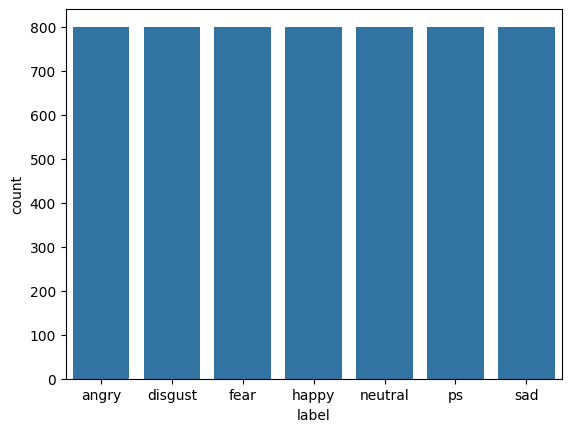

In [46]:
sns.countplot(data=df, x='label')

In [47]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

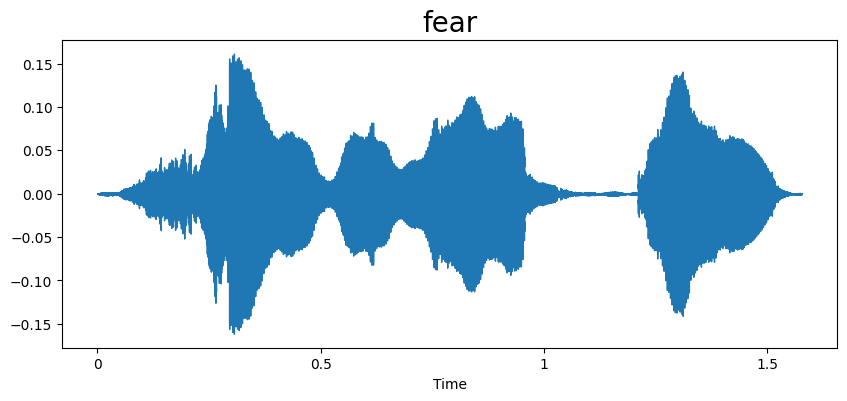

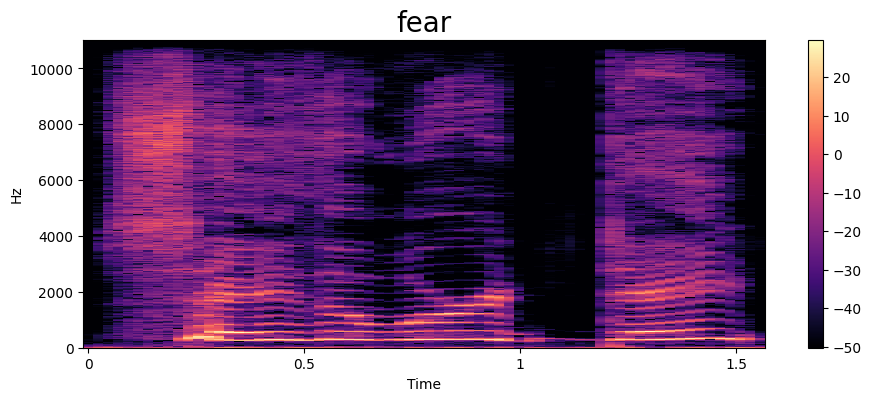

In [48]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

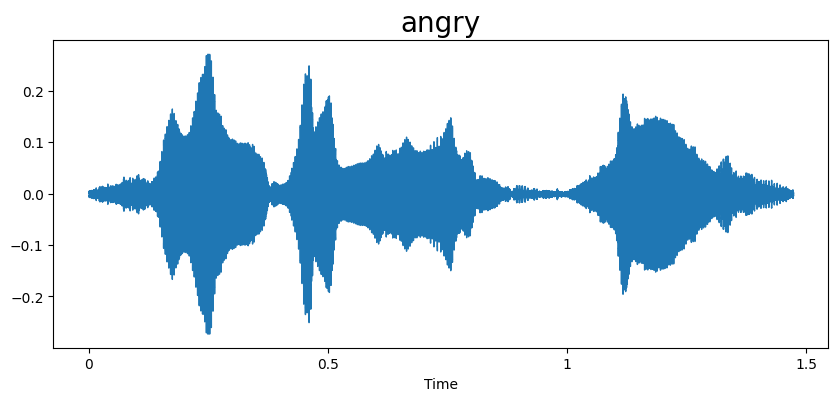

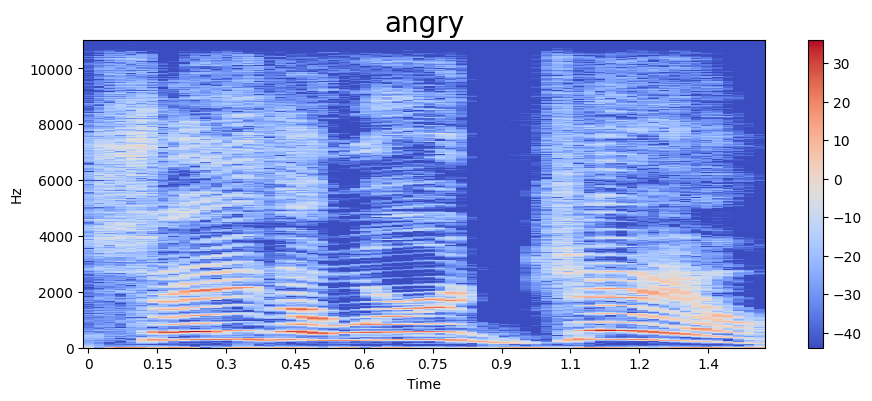

In [19]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

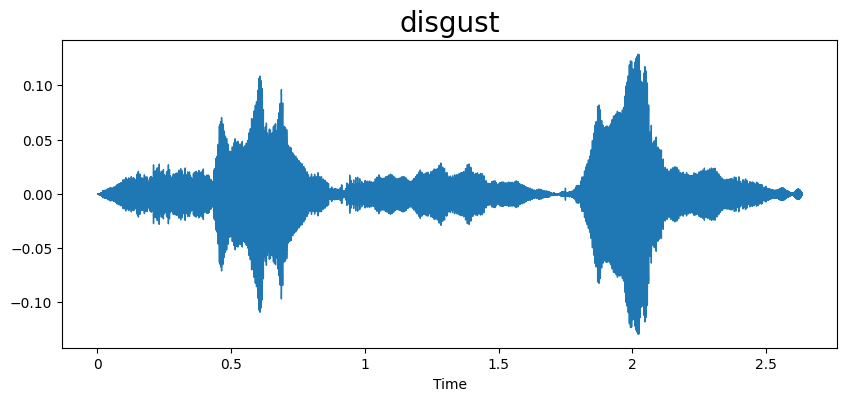

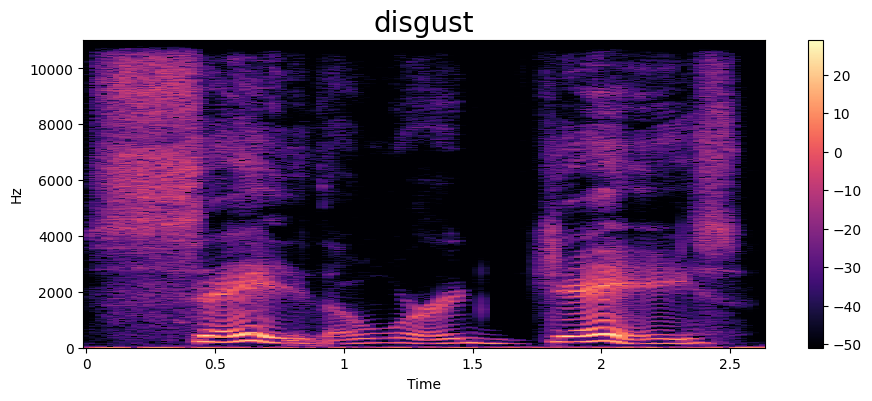

In [20]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

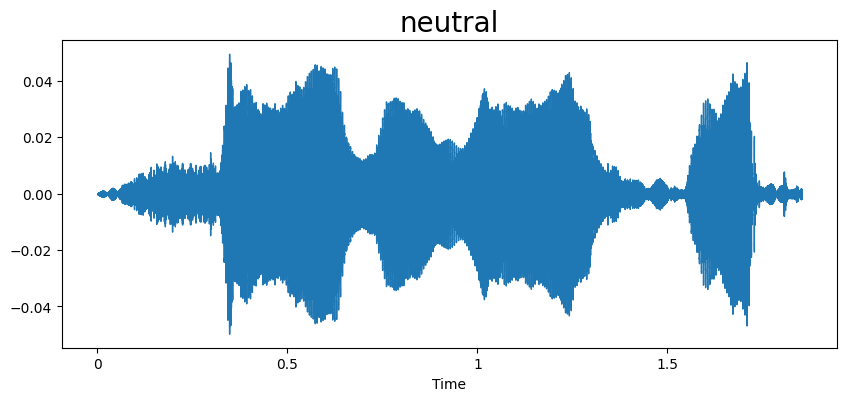

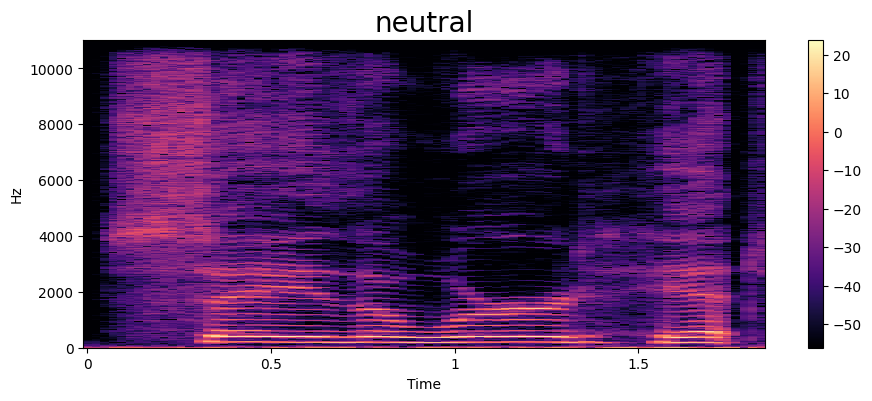

In [21]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

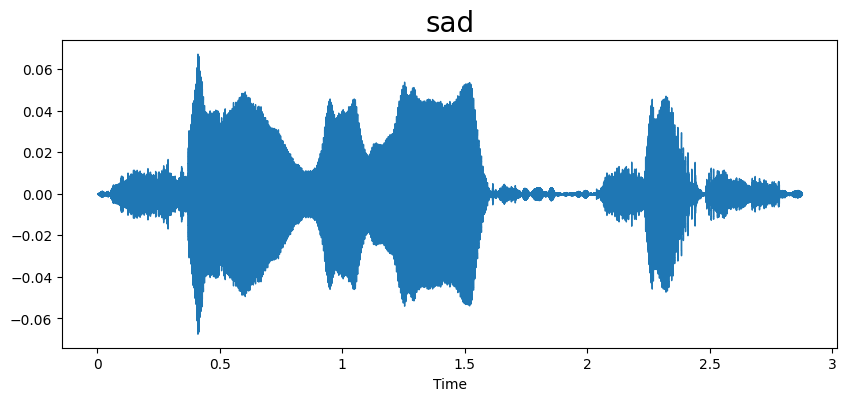

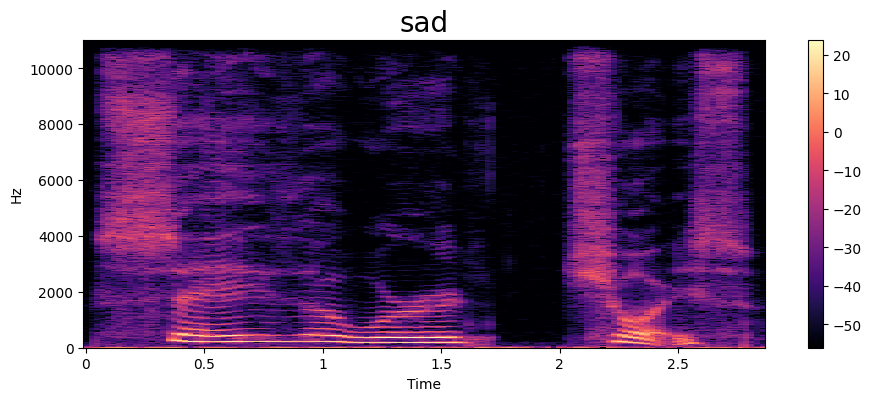

In [22]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

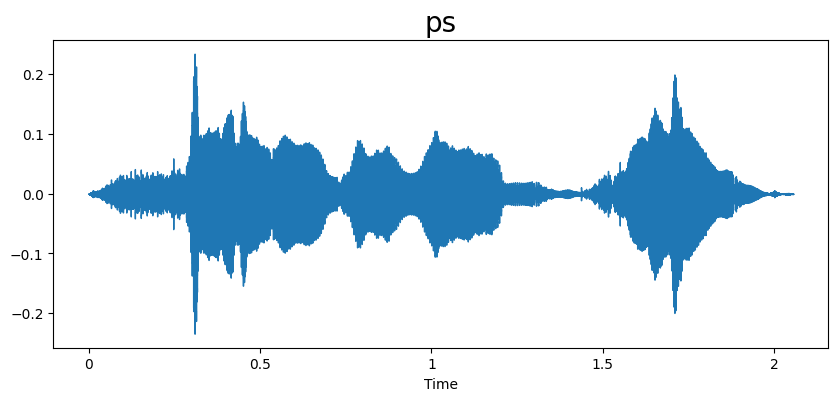

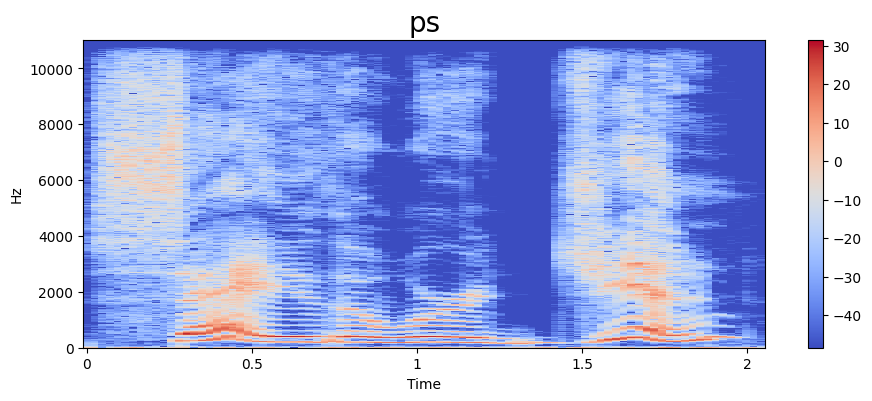

In [23]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

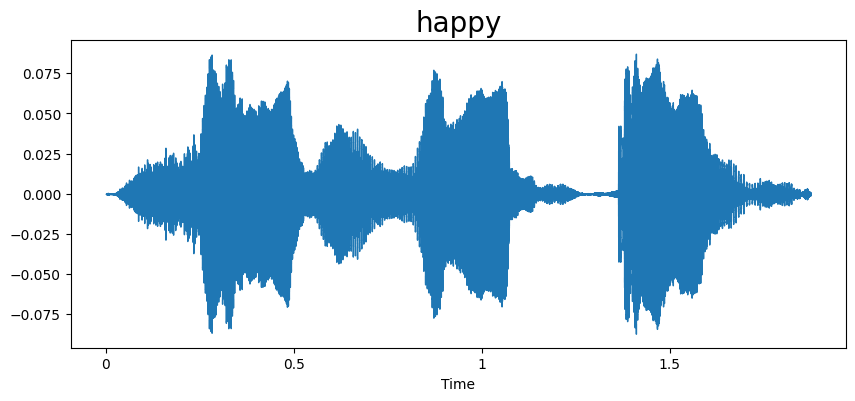

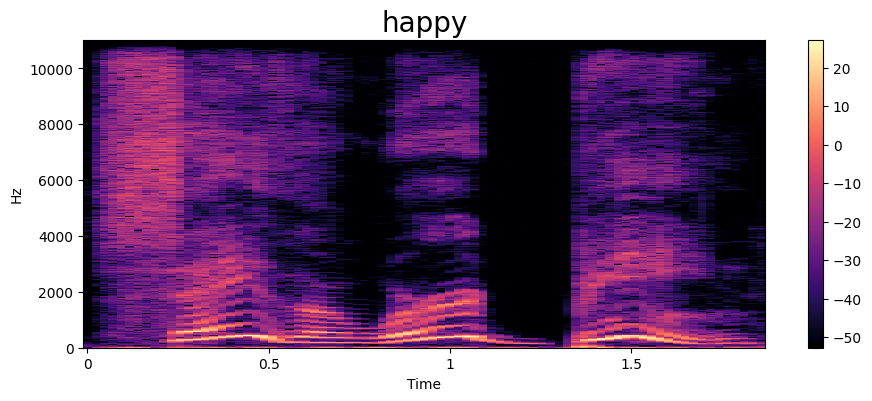

In [24]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

**FEATURE EXTRACTION**

In [25]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [26]:
extract_mfcc(df['speech'][0])

array([-4.2333817e+02,  9.0025116e+01,  1.2121382e+01, -9.8572226e+00,
       -3.0270920e+01, -4.1824841e+00, -1.7973265e+01, -5.6026101e+00,
       -2.5567844e+01, -4.7708402e+00,  6.4471531e+00,  9.0749294e-01,
       -2.0972052e-01,  3.7826431e+00,  8.7448466e-01,  2.6572673e+00,
       -2.9091444e+00, -2.9386895e+00, -1.9502498e+00, -1.3243915e+01,
       -4.4488082e+00, -4.9429741e+00, -7.5593028e+00,  6.6312461e+00,
        4.4688482e+00,  2.1529137e+01,  1.9505939e+01,  2.6136158e+01,
        2.0893393e+01,  1.2769483e+01,  7.1082630e+00,  2.7684128e+00,
        1.0935148e+01,  9.4632524e-01,  1.0130309e+01,  1.9597348e+00,
       -2.8383257e+00,  5.7183776e+00,  2.4957712e+00,  3.1974981e+00],
      dtype=float32)

In [28]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [29]:
X_mfcc

,speech
0,"[-423.33817, 90.025116, 12.121382, -9.857223, ..."
1,"[-379.18195, 77.709236, -10.37204, -5.453776, ..."
2,"[-440.87573, 68.23588, -2.2057128, -1.1948137,..."
3,"[-403.08096, 87.996956, -31.272217, -27.74063,..."
4,"[-428.6321, 100.859566, -27.002722, -40.02559,..."
...,...
5595,"[-418.53574, 88.28475, 27.516254, 37.002735, -..."
5596,"[-408.9849, 108.31331, 23.028603, 34.99108, -8..."
5597,"[-430.72708, 105.83536, 26.838194, 26.281273, ..."
5598,"[-426.8775, 91.07639, 22.93411, 25.029156, -3...."


In [30]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [31]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [32]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [33]:
y = y.toarray()

In [34]:
y.shape

(5600, 7)

**Create LSTM Model**

In [35]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=64)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.9025 - loss: 0.3037 - val_accuracy: 0.9688 - val_loss: 0.1079
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.9133 - loss: 0.2546 - val_accuracy: 0.9848 - val_loss: 0.0572
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9494 - loss: 0.1759 - val_accuracy: 0.9884 - val_loss: 0.0394
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 173ms/step - accuracy: 0.9694 - loss: 0.1015 - val_accuracy: 0.9723 - val_loss: 0.0869
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 191ms/step - accuracy: 0.9711 - loss: 0.0868 - val_accuracy: 0.9857 - val_loss: 0.0479
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 169ms/step - accuracy: 0.9660 - loss: 0.1083 - val_accuracy: 0.9821 - val_loss: 0.0657
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 190ms/step - accuracy: 0.9783 - loss: 0.0743 - val_accuracy: 0.9946 - val_loss: 0.0185
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 19s 166ms/step - accuracy: 0.9806 - loss: 0.0604 - 

**Plot Results**

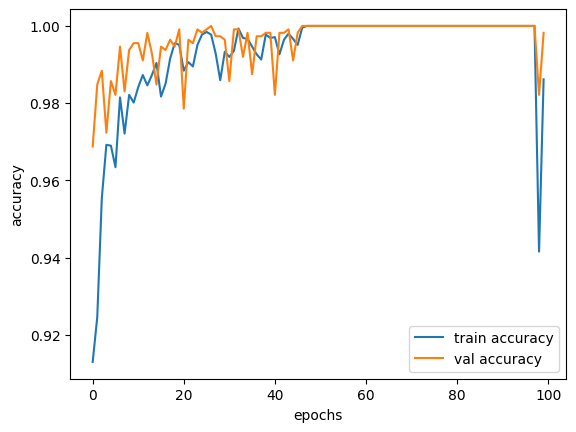

In [49]:
epochs = list(range(100))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

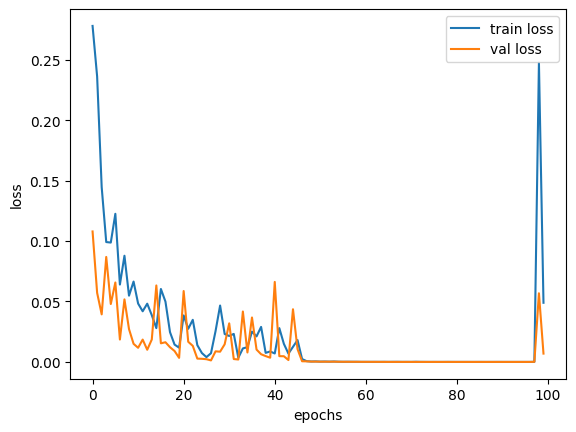

In [50]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

**TESTING**

In [52]:
import numpy as np
import librosa
from keras.models import load_model

# Load your trained model (if saved)
# model = load_model('path_to_your_saved_model.h5')

# Function to load and preprocess audio
def preprocess_audio(file_path):
    # Load the audio file
    audio, sr = librosa.load(file_path, sr=None)

    # Extract features (e.g., MFCCs)
    mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=40)

    # Average the MFCCs across time frames to get a fixed-size input
    mfccs = np.mean(mfccs.T, axis=0)

    # Reshape to (1, 40, 1) for the model
    mfccs = mfccs.reshape(1, 40, 1)

    return mfccs

# Path to your demo audio file
demo_audio_path = '/content/drive/MyDrive/demo_happy.wav'

# Preprocess the audio
audio_features = preprocess_audio(demo_audio_path)

# Make predictions
predictions = model.predict(audio_features)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class to emotion labels (assuming you have a mapping)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class[0]]

print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
Predicted Emotion: Happy


In [53]:
demo_audio_path = '/content/drive/MyDrive/demo_angry.wav'

# Preprocess the audio
audio_features = preprocess_audio(demo_audio_path)

# Make predictions
predictions = model.predict(audio_features)

# Get the predicted class
predicted_class = np.argmax(predictions, axis=1)

# Map predicted class to emotion labels (assuming you have a mapping)
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
predicted_emotion = emotion_labels[predicted_class[0]]

print(f"Predicted Emotion: {predicted_emotion}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Emotion: Angry
